In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df["Age"] = df["Age"].fillna(df["Age"].median())

if "Embarked" in df.columns:
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [27]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


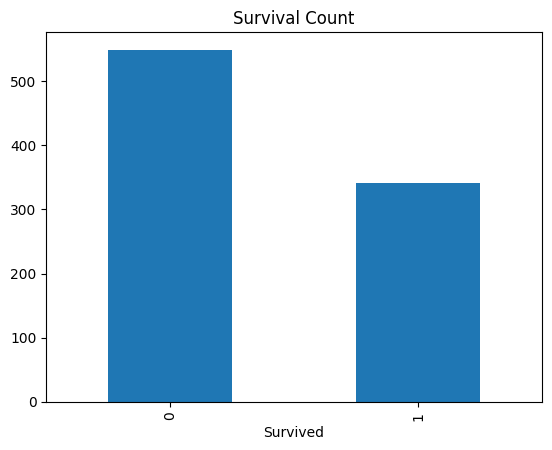

In [28]:
df["Survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.show()

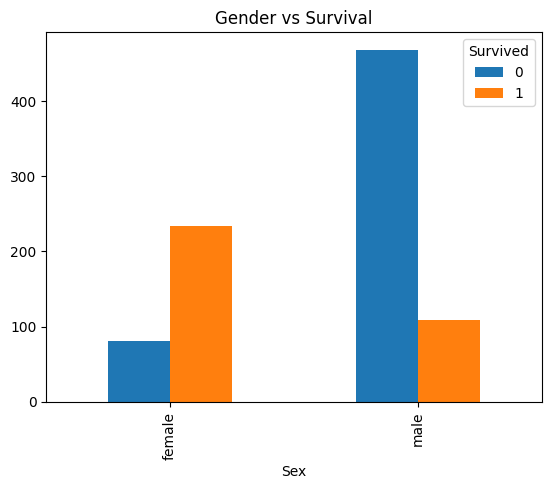

In [29]:
pd.crosstab(df["Sex"], df["Survived"]).plot(kind="bar")
plt.title("Gender vs Survival")
plt.show()

---------------- MODEL TRAINNING-------------

In [31]:
df_ml = df.copy()

df_ml["Sex"] = df_ml["Sex"].map({"male":0,"female":1})

if "Embarked" in df_ml.columns:
    df_ml["Embarked"] = df_ml["Embarked"].astype("category").cat.codes

In [32]:
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","FamilySize"]

if "Embarked" in df_ml.columns:
    features.append("Embarked")

X = df_ml[features]
y = df_ml["Survived"]

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

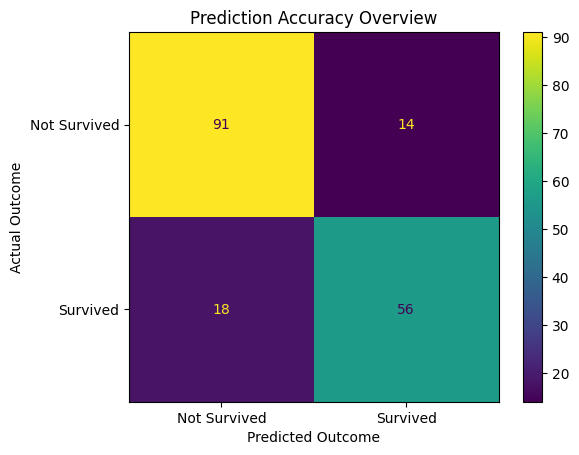

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Not Survived","Survived"])
disp.plot()

plt.title("Prediction Accuracy Overview")
plt.xlabel("Predicted Outcome")
plt.ylabel("Actual Outcome")

plt.show()

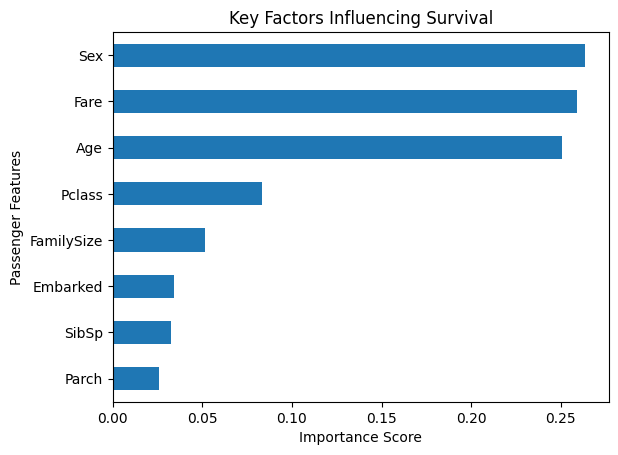

In [40]:
importances.sort_values().plot(kind="barh")

plt.title("Key Factors Influencing Survival")
plt.xlabel("Importance Score")
plt.ylabel("Passenger Features")

plt.show()

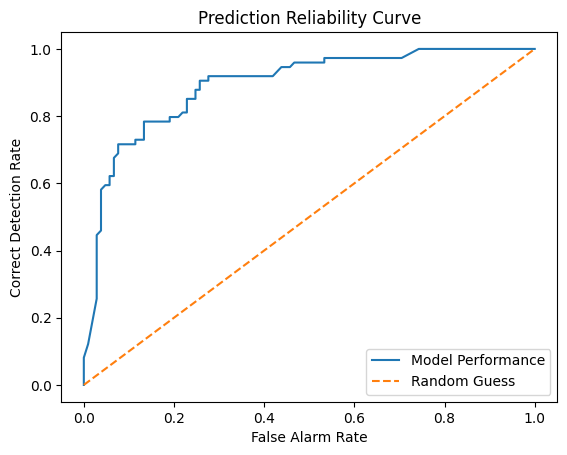

In [53]:
plt.plot(fpr,tpr,label="Model Performance")
plt.plot([0,1],[0,1],'--',label="Random Guess")

plt.title("Prediction Reliability Curve")
plt.xlabel("False Alarm Rate")
plt.ylabel("Correct Detection Rate")

plt.legend()
plt.show()


In [44]:
from sklearn.metrics import accuracy_score

print("Final Accuracy:", accuracy_score(y_test,pred))

Final Accuracy: 0.8212290502793296
